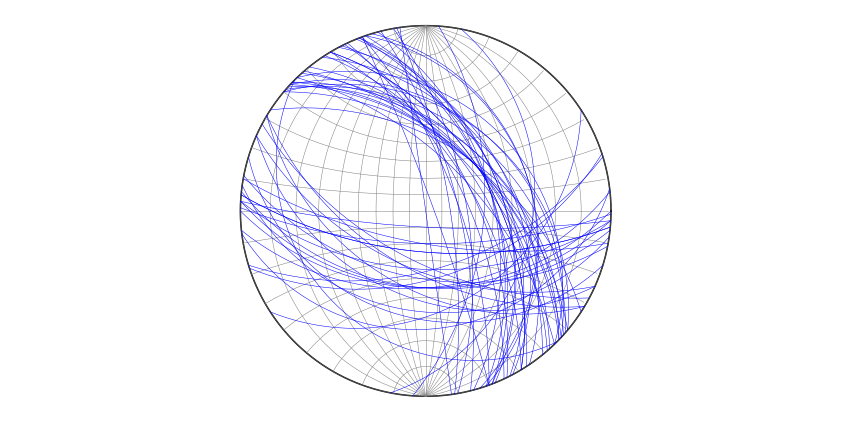

In [3]:
import sys, os
sys.path.append(os.path.abspath('../functions'))

# Import libraries
import numpy as np
import matplotlib.pyplot as plt

from st_coord_line import eq_angle_stereonet
from stereonet_utils import plot_stereonet
from great_circle import great_circle
from pole_utils import plane_from_pole, pole_from_plane
from geogr_to_view import geogr_to_view

# Read the strike-dip data from the Big Elk anticline
beasd = np.loadtxt(os.path.abspath('../data/ch5-6/beasd.txt'))
beasd = np.radians(beasd)

# Draw a lower hemisphere equal angle stereonet
plot_stereonet(eq_angle_stereonet, np.radians(10))

# Plot the great circles
for i in range(beasd.shape[0]):
    GC_T, GC_P = great_circle(beasd[i,0], beasd[i,1])
    X, Y = eq_angle_stereonet(GC_T, GC_P)
    plt.plot(X, Y, 'b', linewidth=0.5)

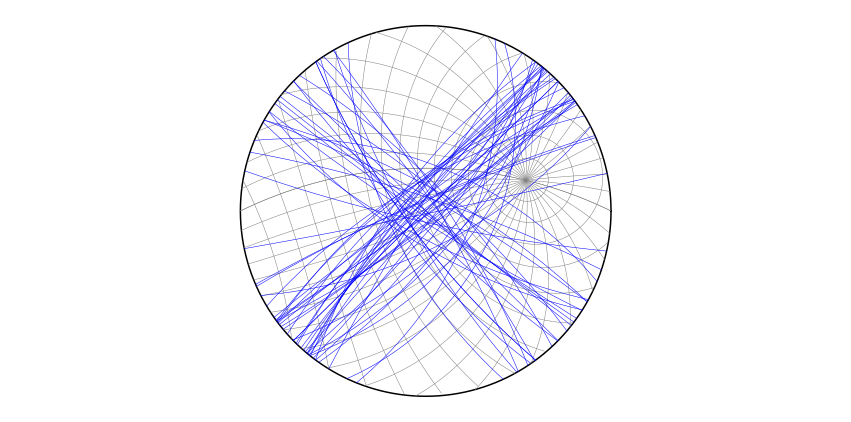

In [4]:
# Draw the same data in an equal angle stereonet,
# but make the view direction = fold axis
trdv, plgv, intrad = np.radians([125, 26, 10])
plot_stereonet(eq_angle_stereonet, intrad, trdv, plgv)

# Plot the great circles
for i in range(beasd.shape[0]):
    # pole to bed
    trdp, plgp = pole_from_plane(beasd[i,0], beasd[i,1])
    # transform pole
    trdpt, plgpt = geogr_to_view(trdp, plgp, trdv, plgv)
    # bed from transformed pole
    striket, dipt = plane_from_pole(trdpt, plgpt)
    # plot great circle
    GC_T, GC_P = great_circle(striket, dipt)
    X, Y = eq_angle_stereonet(GC_T, GC_P)
    plt.plot(X, Y, 'b', linewidth=0.5) 